In [155]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.api as sm


In [6]:
df = pd.read_csv("../energy_data.csv")
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20,20.700000,44.700000,19.500000,45.590000,21.390000,41.95,20.566667,45.626667,...,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.70,20.463333,37.526667,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.29,21.323333,34.730000,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.79,15.890000,47.530000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,30,21.700000,46.633333,20.700000,45.900000,22.323333,44.79,21.000000,47.966667,...,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   1000 non-null   int64  
 1   lights       1000 non-null   int64  
 2   T1           1000 non-null   float64
 3   RH_1         1000 non-null   float64
 4   T2           1000 non-null   float64
 5   RH_2         1000 non-null   float64
 6   T3           1000 non-null   float64
 7   RH_3         1000 non-null   float64
 8   T4           1000 non-null   float64
 9   RH_4         1000 non-null   float64
 10  T5           1000 non-null   float64
 11  RH_5         1000 non-null   float64
 12  T6           1000 non-null   float64
 13  RH_6         1000 non-null   float64
 14  T7           1000 non-null   float64
 15  RH_7         1000 non-null   float64
 16  T8           1000 non-null   float64
 17  RH_8         1000 non-null   float64
 18  T9           1000 non-null   float64
 19  RH_9   

In [9]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,94.580000,3.880000,21.689083,40.220658,20.308276,40.456847,22.291003,39.193848,20.877548,38.883203,...,35.202685,22.110523,42.876733,19.500280,41.421305,7.270235,755.522126,79.722845,4.057964,38.219167
std,95.963705,8.075321,1.533835,3.966141,2.123854,4.080899,1.939537,3.171917,1.947205,4.297529,...,5.069127,1.877895,5.208331,1.926965,4.132533,5.207305,7.433976,14.623087,2.454295,11.679127
min,20.000000,0.000000,16.823333,28.193333,16.200000,24.823333,17.290000,33.200000,15.160000,29.421429,...,23.290000,16.583333,29.600000,15.000000,29.426667,-4.955556,730.700000,24.500000,0.000000,3.333333
25%,50.000000,0.000000,20.790000,37.200000,18.790000,38.057500,20.823333,36.900000,19.566667,35.484167,...,31.352738,20.910625,39.200000,18.100000,38.421429,3.537500,750.800000,70.000000,2.000000,28.666667
50%,60.000000,0.000000,21.600000,39.700000,19.890000,40.400000,22.100000,38.500000,20.760000,38.290000,...,34.609111,22.200000,42.352333,19.500000,40.566667,6.841667,755.941667,83.833333,3.666667,40.000000
75%,100.000000,0.000000,22.533333,42.861667,21.390000,43.200000,23.390000,41.500000,22.100000,41.992500,...,39.000000,23.441857,46.430694,20.600000,44.308333,10.433333,760.937500,91.333333,5.666667,40.000000
max,800.000000,40.000000,26.066667,54.800000,29.100000,53.249880,28.867143,49.930000,26.100000,50.963333,...,49.444444,27.100000,56.598333,24.434000,52.700000,25.600000,772.200000,100.000000,13.000000,65.000000


In [ ]:
q1 = df.quantile(0.25)
q2 = df.quantile(0.50)
q3 = df.quantile(0.75)
IQR = q3 - q1

lb = q1 - IQR*1.5
ub = q3 + IQR*1.5

In [35]:
df = df.clip(lb, ub, axis=1)

In [36]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,0,20.700000,44.700000,19.500000,45.590000,21.390000,41.95,20.566667,45.626667,...,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.70,20.463333,37.526667,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.29,21.323333,34.730000,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.79,15.890000,47.530000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,0,21.700000,46.633333,20.700000,45.900000,22.323333,44.79,21.000000,47.966667,...,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


In [37]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
dtype: int64

In [58]:
out = df.Appliances
inp = df.drop(columns=['Appliances', 'lights'])

In [39]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(inp), columns=inp.columns)
df_sc.head()


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,-0.657752,1.144744,-0.383387,1.284090,-0.465653,0.871164,-0.161036,1.569934,-0.872858,0.369678,...,1.596204,-0.860674,1.904300,-0.619766,1.493640,0.741837,0.134047,0.592772,1.972363,0.044013
1,-0.265350,-0.597754,-0.438649,-0.202304,-0.257709,-0.787334,-0.214324,-0.315813,-0.120411,-1.018018,...,-0.613368,-0.059786,-0.701804,0.051834,-0.628322,0.218858,0.849943,-0.678281,-0.226541,0.218541
2,-0.198841,-1.126196,-0.488888,-0.694703,0.246556,-1.548664,0.229167,-0.966900,-0.665416,-0.928366,...,-1.184758,0.148445,-1.073190,-0.019134,-1.433844,-0.072048,0.922439,-0.701391,-0.432688,-0.193980
3,-1.766232,0.412402,-0.869023,0.205661,-2.175996,1.452428,-2.572734,2.013046,-2.383410,0.102153,...,0.974265,-1.344173,1.572508,-2.284919,1.292663,-0.411984,1.907930,0.846983,0.323185,-1.383946
4,0.007336,1.637503,0.219471,1.361838,0.019550,1.768332,0.062428,2.114706,-0.001603,0.890502,...,1.973183,-0.876989,1.981032,-0.628421,2.528389,0.274425,0.274507,1.101193,0.804195,1.678232


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:

vif = pd.DataFrame([variance_inflation_factor(df_sc.values, i) for i in range(df_sc.shape[1])], columns=["vif"], index=df_sc.columns)
vif.sort_values("vif", ascending=False)

,vif
T6,29.903479
T_out,28.837184
T9,25.595330
T2,23.892486
T1,18.700786
RH_2,18.010542
RH_4,17.486304
RH_1,16.093885
T7,15.571387
RH_7,10.455543


In [ ]:
index = vif.vif.idxmax(axis=0)
vif.loc[index].values[0]

29.903479259755123

In [99]:
def remove_autocorelation(df):
    th = 10
    while(True):
        vif = pd.DataFrame([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], columns=["vif"], index=df.columns)
        index = vif.vif.idxmax(axis=0)
        if vif.loc[index].values[0] > th:
            df.drop(columns=[index], inplace=True)
        else:
            break
    
    display(vif.sort_values(by='vif', ascending=False))
    return df

In [101]:
df1 = remove_autocorelation(df_sc)

,vif
T1,9.704637
RH_1,9.091161
T3,8.648019
RH_3,8.620173
RH_6,8.330233
RH_7,8.040868
RH_8,7.485922
T5,7.254300
T_out,6.787443
T4,6.138731


In [130]:
xc = sm.add_constant(df1)
ols = sm.OLS(out, xc)

In [131]:
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     19.47
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.89e-53
Time:                        11:20:37   Log-Likelihood:                -4995.3
No. Observations:                1000   AIC:                         1.003e+04
Df Residuals:                     981   BIC:                         1.012e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          77.9300      1.141     68.289      0.000      75.691      80.169
T1            -11.1222      3.555     -3.129      0.002     -18.098      -4.146
RH_1           18.1250      3.441      5.268      0.000      11.373      24.877
RH_2          -10.4089      2.672     -3.895      0.000     -15.653      -5.165
T3             18.0590      3.356      5.381      0.000      11.473      24.645
RH_3           15.7203      3.350      4.692      0.000       9.145      22.295
T4             -2.8183      2.827     -0.997      0.319      -8.367       2.730
T5             -7.1161      3.074     -2.315      0.021     -13.148      -1.085
RH_5            3.5494      1.434      2.475      0.014       0.735       6.364
RH_6            6.9738      3.294      2.117      0.034       0.510      13.437
RH_7           -6.1803      3.236     -1.910      0.056     -12.531       0.170
T8             12.5294      2.712      4.620      0.000       7.208      17.851
RH_8          -19.5431      3.122     -6.259      0.000     -25.670     -13.416
RH_9           -9.9742      2.687     -3.711      0.000     -15.248      -4.700
T_out           5.0436      2.973      1.696      0.090      -0.791      10.878
Press_mm_hg     0.3994      1.361      0.293      0.769      -2.272       3.071
RH_out          0.5964      2.642      0.226      0.821      -4.588       5.781
Windspeed       4.2343      1.416      2.990      0.003       1.455       7.014
Visibility     -0.5619      1.169     -0.481      0.631      -2.855       1.731
==============================================================================
Omnibus:                      179.544   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.211
Skew:                           1.146   Prob(JB):                     1.76e-65
Kurtosis:                       4.380   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Backward Elimination
Start with all predictors, then remove the least significant one step-by-step (based on p-value) until only statistically significant ones remain.

In [134]:
ols_mod.pvalues[1:].idxmax(axis=0)

'RH_out'

In [ ]:
ols_mod.pvalues.loc['RH_out']

0.8214465608459682

In [138]:
df2 = df1.copy()


In [ ]:
def backward_elimination(df: pd.DataFrame, th: float = 0.05) -> pd.DataFrame:
    while(True):
        xc = sm.add_constant(df)
        ols = sm.OLS(out, xc)
        ols_mod = ols.fit()
        col = ols_mod.pvalues[1:].idxmax(axis=0)
        if ols_mod.pvalues.loc[col] > 0.05:
            df.drop(columns=[col], inplace=True)
        else:
            break
    return df


In [142]:
df_be = backward_elimination(df1)
df_be.head()

,T1,RH_1,RH_2,T3,RH_3,T5,RH_5,T8,RH_8,RH_9,Windspeed
0,-0.657752,1.144744,1.284090,-0.465653,0.871164,-0.872858,0.369678,-0.860674,1.904300,1.493640,1.972363
1,-0.265350,-0.597754,-0.202304,-0.257709,-0.787334,-0.120411,-1.018018,-0.059786,-0.701804,-0.628322,-0.226541
2,-0.198841,-1.126196,-0.694703,0.246556,-1.548664,-0.665416,-0.928366,0.148445,-1.073190,-1.433844,-0.432688
3,-1.766232,0.412402,0.205661,-2.175996,1.452428,-2.383410,0.102153,-1.344173,1.572508,1.292663,0.323185
4,0.007336,1.637503,1.361838,0.019550,1.768332,-0.001603,0.890502,-0.876989,1.981032,2.528389,0.804195


In [143]:
ols = sm.OLS(out, sm.add_constant(df_be))
ols_mod = ols.fit()
display(ols_mod.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     30.83
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           2.84e-56
Time:                        11:35:08   Log-Likelihood:                -5000.4
No. Observations:                1000   AIC:                         1.002e+04
Df Residuals:                     988   BIC:                         1.008e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.9300      1.143     68.180      0.000      75.687      80.173
T1           -10.9153      3.184     -3.428      0.001     -17.164      -4.667
RH_1          16.9525      3.118      5.437      0.000      10.834      23.071
RH_2          -9.1523      2.233     -4.098      0.000     -13.535      -4.770
T3            15.7880      3.012      5.242      0.000       9.877      21.699
RH_3          16.2485      3.087      5.263      0.000      10.190      22.307
T5            -9.6586      2.905     -3.325      0.001     -15.359      -3.958
RH_5           3.4447      1.389      2.480      0.013       0.719       6.170
T8            12.2653      2.557      4.797      0.000       7.248      17.283
RH_8         -21.0758      2.592     -8.131      0.000     -26.162     -15.989
RH_9          -9.9531      2.563     -3.883      0.000     -14.983      -4.923
Windspeed      4.6942      1.238      3.792      0.000       2.265       7.123
==============================================================================
Omnibus:                      179.679   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.960
Skew:                           1.151   Prob(JB):                     3.28e-65
Kurtosis:                       4.351   Cond. No.                         8.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, root_mean_squared_error
from sklearn.metrics import make_scorer

In [ ]:
lr = LinearRegression()
sfs = SequentialFeatureSelector(estimator=lr, direction='backward', cv=5, scoring="r2")
sfs.fit(df2, out)


SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          scoring='r2')

In [ ]:
sfs.

'r2'

In [167]:
sfs.get_feature_names_out()

array(['T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T8', 'RH_8', 'RH_9',
       'Windspeed'], dtype=object)

In [168]:
# Get a boolean mask of selected features
sfs.get_support()


array([ True,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False])

In [173]:
pd.DataFrame(sfs.transform(df2), columns=sfs.get_feature_names_out())


,T1,RH_1,RH_2,T3,RH_3,T8,RH_8,RH_9,Windspeed
0,-0.657752,1.144744,1.284090,-0.465653,0.871164,-0.860674,1.904300,1.493640,1.972363
1,-0.265350,-0.597754,-0.202304,-0.257709,-0.787334,-0.059786,-0.701804,-0.628322,-0.226541
2,-0.198841,-1.126196,-0.694703,0.246556,-1.548664,0.148445,-1.073190,-1.433844,-0.432688
3,-1.766232,0.412402,0.205661,-2.175996,1.452428,-1.344173,1.572508,1.292663,0.323185
4,0.007336,1.637503,1.361838,0.019550,1.768332,-0.876989,1.981032,2.528389,0.804195
...,...,...,...,...,...,...,...,...,...
995,-0.597894,0.097206,-0.017549,-1.084288,0.283582,-0.593712,0.868902,-0.239282,-0.638835
996,0.206862,-1.276572,-0.829298,-0.465653,-1.482324,0.362015,-0.637132,-1.789791,-1.257277
997,0.067194,0.548336,1.501448,-0.044566,-0.190275,-0.171910,-0.156891,-0.265111,-0.020394
998,-0.285303,-1.253633,-1.622654,-1.037500,-0.989513,0.988487,-1.732080,-0.658993,0.804195


In [177]:
xtrain, xtest, ytrain, ytest = train_test_split(df2, out, train_size=0.7, random_state=29)

In [182]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [184]:
ypred = lr.predict(xtest)

In [186]:
r2_score(ytest, ypred)

0.23742642424697258

In [187]:
root_mean_squared_error(ytest, ypred)

35.42358968048131

# Forward Elimination
Start with no features. Gradually add the most useful features — statistically significant in the model.

In [ ]:

def forward_feature_elimination(X: pd.DataFrame, y: pd.Series, significance_level=0.05):
    remaining_features = list(X.columns)
    selected_features = []
    
    while remaining_features:
        best_pval = float('inf')
        best_feature = None

        for feature in remaining_features:
            candidate_features = selected_features + [feature]
            X_candidate = sm.add_constant(X[candidate_features])
            model = sm.OLS(y, X_candidate).fit()
            pval = model.pvalues[feature]

            if pval < best_pval:
                best_pval = pval
                best_feature = feature
        
        if best_pval < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return X[selected_features]


In [212]:
forward_feature_elimination(df2, out)

,RH_out,RH_1,RH_8,RH_3,T8,RH_9,Windspeed,RH_2,T5,T3,T1,RH_5
0,0.592772,1.144744,1.904300,0.871164,-0.860674,1.493640,1.972363,1.284090,-0.872858,-0.465653,-0.657752,0.369678
1,-0.678281,-0.597754,-0.701804,-0.787334,-0.059786,-0.628322,-0.226541,-0.202304,-0.120411,-0.257709,-0.265350,-1.018018
2,-0.701391,-1.126196,-1.073190,-1.548664,0.148445,-1.433844,-0.432688,-0.694703,-0.665416,0.246556,-0.198841,-0.928366
3,0.846983,0.412402,1.572508,1.452428,-1.344173,1.292663,0.323185,0.205661,-2.383410,-2.175996,-1.766232,0.102153
4,1.101193,1.637503,1.981032,1.768332,-0.876989,2.528389,0.804195,1.361838,-0.001603,0.019550,0.007336,0.890502
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.465667,0.097206,0.868902,0.283582,-0.593712,-0.239282,-0.638835,-0.017549,-0.510778,-1.084288,-0.597894,1.551843
996,0.396337,-1.276572,-0.637132,-1.482324,0.362015,-1.789791,-1.257277,-0.829298,0.124747,-0.465653,0.206862,2.299200
997,0.223011,0.548336,-0.156891,-0.190275,-0.171910,-0.265111,-0.020394,1.501448,0.105889,-0.044566,0.067194,-0.259792
998,-1.348473,-1.253633,-1.732080,-0.989513,0.988487,-0.658993,0.804195,-1.622654,-0.927547,-1.037500,-0.285303,-0.665610


In [214]:
sfe = SequentialFeatureSelector(estimator=lr, direction='forward', scoring='r2', cv=5)
sfe.fit(df2, out)

SequentialFeatureSelector(estimator=LinearRegression(), scoring='r2')

In [215]:
sfe.get_feature_names_out()

array(['RH_1', 'T3', 'RH_3', 'T5', 'T8', 'RH_8', 'RH_9', 'RH_out',
       'Windspeed'], dtype=object)

In [216]:
df2.columns[sfe.get_support()]

Index(['RH_1', 'T3', 'RH_3', 'T5', 'T8', 'RH_8', 'RH_9', 'RH_out',
       'Windspeed'],
      dtype='object')

# Recursive Feature Elimination (RFE)


In [221]:
import statsmodels.api as sm
import pandas as pd

def custom_rfe_pvalues(X: pd.DataFrame, y: pd.Series, num_features: int):
    """
    Recursively eliminate features based on highest p-values using OLS until num_features are left.
    
    Parameters:
        X (pd.DataFrame): Feature matrix
        y (pd.Series): Target variable
        num_features (int): Desired number of features to keep

    Returns:
        selected_features (List[str]): Final selected feature names
        log (List[Tuple[str, float]]): Ordered elimination log [(feature_removed, p_value)]
    """
    features = list(X.columns)
    elimination_log = []

    while len(features) > num_features:
        X_ols = sm.add_constant(X[features])
        model = sm.OLS(y, X_ols).fit()
        pvals = model.pvalues.drop("const")  # exclude intercept
        
        worst_feature = pvals.idxmax()
        worst_pval = pvals[worst_feature]
        
        elimination_log.append((worst_feature, worst_pval))
        print(f"[-] Removing: {worst_feature} (p = {worst_pval:.4f})")
        
        features.remove(worst_feature)

    print("\n✅ Final selected features:")
    print(features)
    return features, elimination_log


In [220]:
from sklearn.feature_selection import RFE

In [224]:
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(df2, out)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [228]:
pd.DataFrame({"feature": rfe.feature_names_in_, "ranks": rfe.ranking_})

,feature,ranks
0,T1,2
1,RH_1,1
2,RH_2,1
3,T3,3
4,RH_3,1
5,T4,11
6,T5,5
7,RH_5,10
8,RH_6,7
9,RH_7,8


In [230]:
rfe.get_feature_names_out()

array(['RH_1', 'RH_2', 'RH_3', 'T8', 'RH_8'], dtype=object)

In [231]:
from sklearn.feature_selection import RFECV

In [232]:
rfecv = RFECV(estimator=lr, cv=5, scoring="r2")
rfecv.fit(df2, out)

RFECV(cv=5, estimator=LinearRegression(), scoring='r2')

In [233]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 3])

In [234]:
pd.DataFrame({"feature": rfecv.feature_names_in_, "ranks": rfecv.ranking_})

,feature,ranks
0,T1,1
1,RH_1,1
2,RH_2,1
3,T3,1
4,RH_3,1
5,T4,1
6,T5,1
7,RH_5,1
8,RH_6,1
9,RH_7,1


In [237]:
rfecv.get_feature_names_out()

array(['T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_5', 'RH_6',
       'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Windspeed'], dtype=object)

# Regularization

In [270]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate

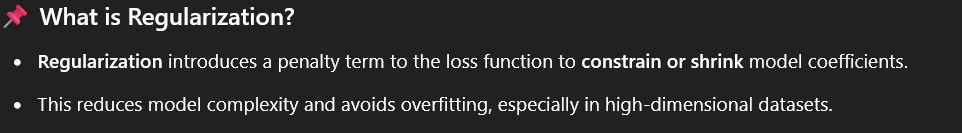

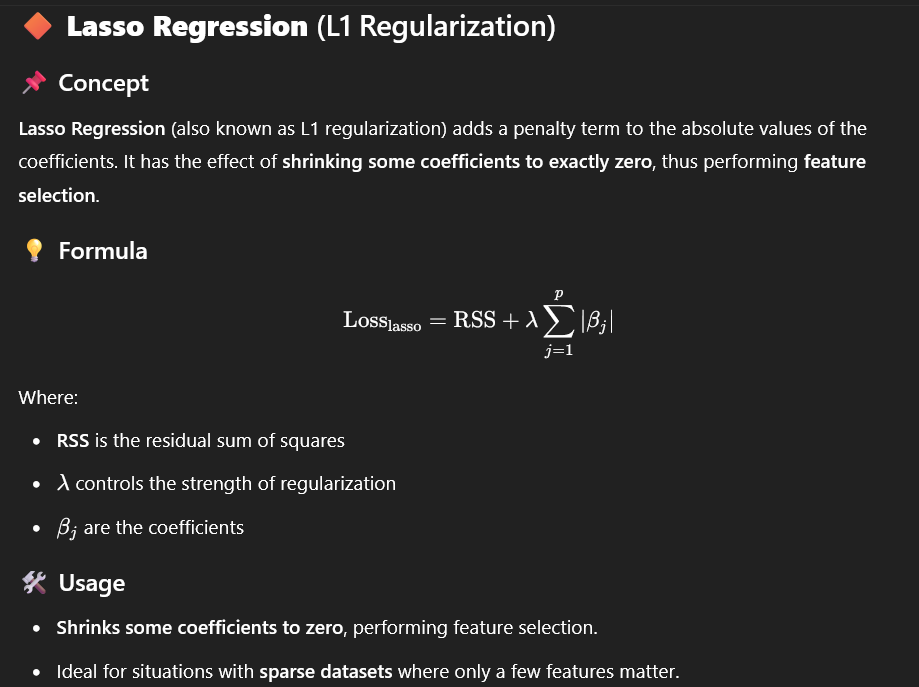

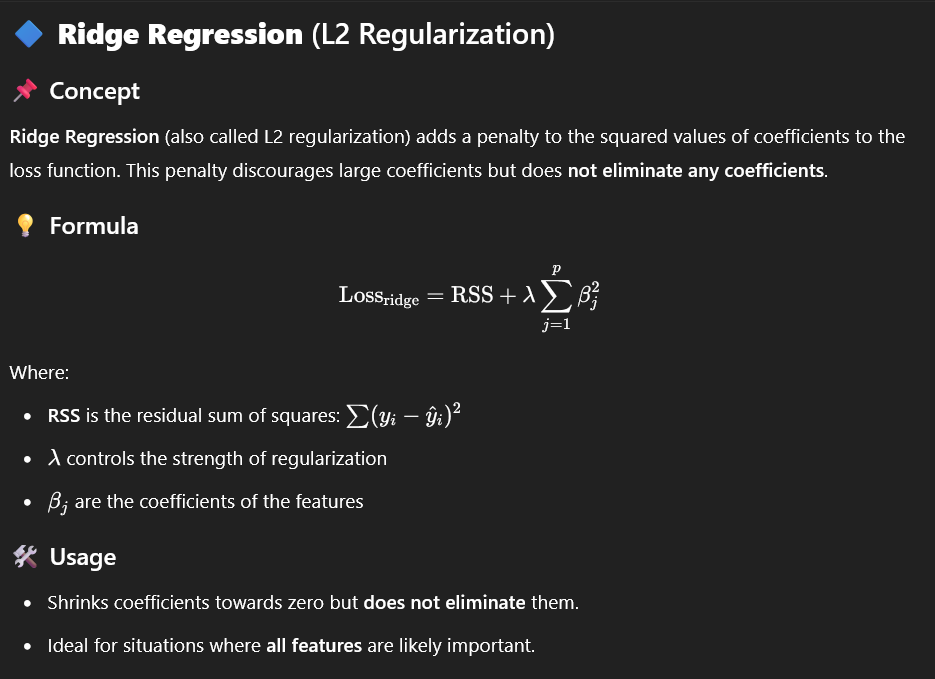

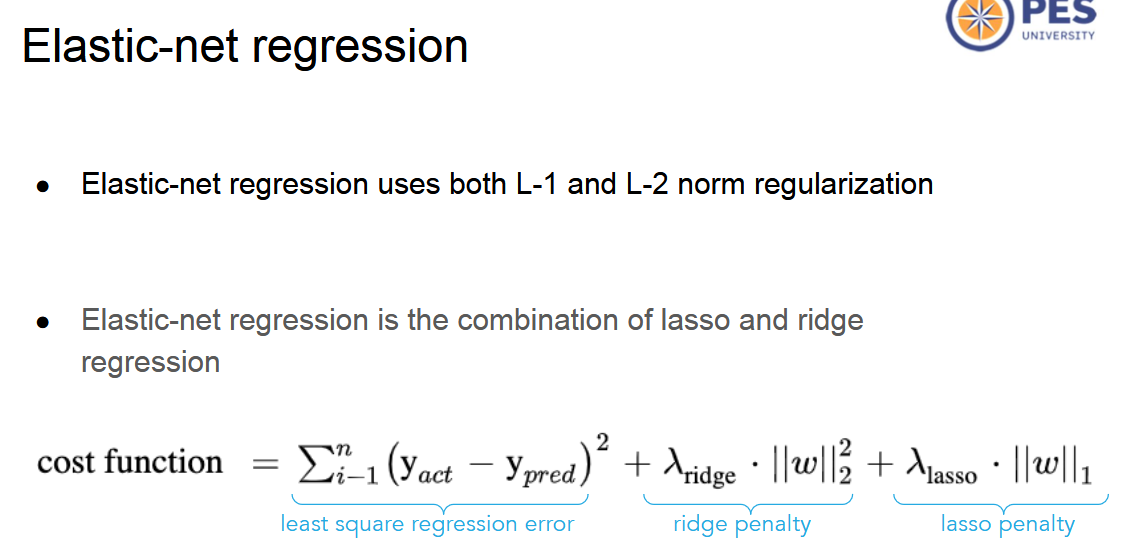
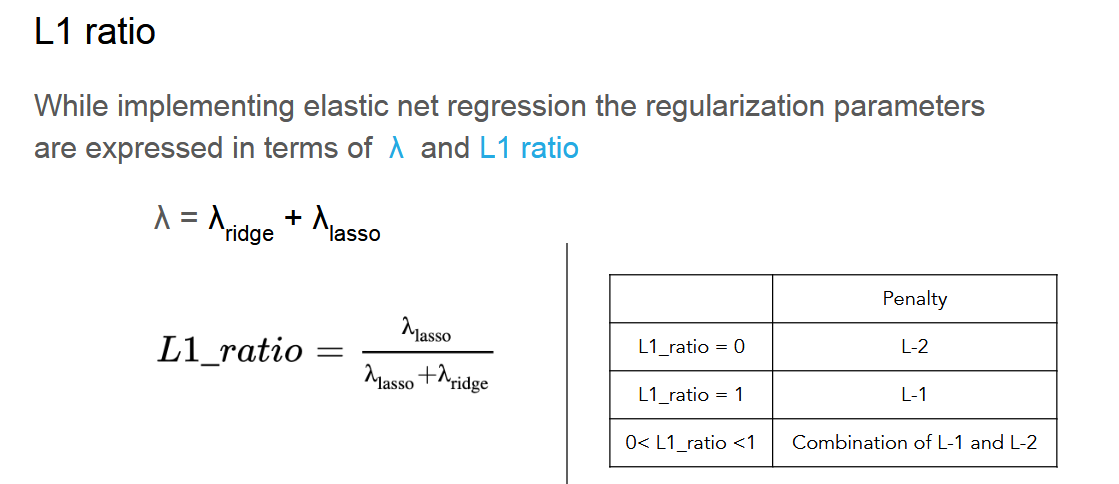

In [244]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [248]:
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

In [251]:
rmse_train = root_mean_squared_error(ytrain, ypred_train)
rmse_test = root_mean_squared_error(ytest, ypred_test)
rmse_train, rmse_test

(35.98727752854816, 35.42358968048131)

In [260]:
lr.score(xtrain, ytrain), lr.score(xtest, ytest)

(0.26828407156974066, 0.23742642424697258)

In [272]:
kfold = KFold(n_splits=10)
lasso = Lasso()
cv_score = cross_val_score(estimator=lasso, X=df2, y=out, cv=kfold, scoring='r2')
cv_score

array([ 0.24982806, -0.1396452 ,  0.24745813,  0.0893212 ,  0.26099155,
        0.15519368,  0.2273418 ,  0.19492756,  0.24641279,  0.15762582])

In [274]:
param = {"alpha": [0.001, 0.01, .1, 1, 10]}
gscv = GridSearchCV(estimator=lasso, param_grid=param, cv=kfold, scoring="r2")
gscv.fit(df2, out)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Lasso(), param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='r2')

In [275]:
gscv.best_params_

{'alpha': 0.1}

In [277]:
pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002972,0.001336,0.001962,0.001251,0.001,{'alpha': 0.001},0.314466,-0.221664,0.364428,0.055901,0.244040,0.170435,0.212758,0.271250,0.285800,0.237594,0.193501,0.159722,3
1,0.002630,0.000678,0.001107,0.000539,0.010,{'alpha': 0.01},0.314462,-0.221231,0.363520,0.056841,0.244746,0.170764,0.213785,0.271014,0.285519,0.236680,0.193610,0.159409,2
2,0.001341,0.001131,0.001878,0.003057,0.100,{'alpha': 0.1},0.313353,-0.217746,0.353693,0.065574,0.251113,0.173300,0.223082,0.268826,0.281791,0.227111,0.194010,0.156433,1
3,0.003326,0.004555,0.000706,0.000644,1.000,{'alpha': 1},0.249828,-0.139645,0.247458,0.089321,0.260992,0.155194,0.227342,0.194928,0.246413,0.157626,0.168946,0.115391,4
4,0.001113,0.000829,0.000673,0.000590,10.000,{'alpha': 10},0.015546,-0.075757,-0.014727,-0.008814,0.009617,-0.004071,0.000437,0.012455,-0.009432,0.012042,-0.006270,0.025260,5


In [278]:
from sklearn.model_selection import RandomizedSearchCV